In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics 
from scipy.spatial.distance import cdist 
import joblib
from collections import Counter

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# import main csv 
beer_csv = pd.read_csv("/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/final_beerdata_binary.gz", compression="gzip")

In [4]:
#Limited Features DF
kmean_df = beer_csv[['beer_abv',
 'numberof_reviews',
 'review_overall',
 'review_aroma',
 'review_appearance',
 'review_palate',
 'review_taste', 
 'beer_style_ale',
 'beer_style_barleywine',
 'beer_style_bitter',
 'beer_style_exotic',
 'beer_style_ipa',
 'beer_style_kölsch',
 'beer_style_lager',
 'beer_style_pilsener',
 'beer_style_porter',
 'beer_style_stout',
 'beer_style_trappist',
 'beer_strength_Full',
 'beer_strength_Heavy',
 'beer_strength_Light',
 'beer_strength_Mid',
 'beer_strength_Very Strong'
 ]]



In [5]:
dataset = kmean_df

In [6]:
#convert DF into Numpy array for the model
dataset = dataset.to_numpy()

In [6]:
#inital test conditions for Model
i = range(15,31)
for i in i:
    KMean= KMeans(n_clusters=i, init='k-means++', n_init=100,max_iter=300, algorithm='auto')
    KMean.fit(dataset)
    beer_clusters=KMean.predict(dataset)
    print(f"Silhouette Score {(i)}: {silhouette_score(dataset, beer_clusters, metric='euclidean')}")


Silhouette Score 15: 0.6765905133517968
Silhouette Score 16: 0.671309245053375
Silhouette Score 17: 0.671495644958294
Silhouette Score 18: 0.6399750568948697
Silhouette Score 19: 0.6361309648849242
Silhouette Score 20: 0.6427559852848502
Silhouette Score 21: 0.6268338198848417
Silhouette Score 22: 0.6117240810185828
Silhouette Score 23: 0.5672995949432661
Silhouette Score 24: 0.5712319264001856
Silhouette Score 25: 0.570713326418451
Silhouette Score 26: 0.5865452316354354
Silhouette Score 27: 0.5676597389148494
Silhouette Score 28: 0.5206181617526727
Silhouette Score 29: 0.5739202029466229
Silhouette Score 30: 0.5291021300850414


In [ ]:
#Elbow review of Model to determine number of clusters
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
N = range(15,31) 
  
for n in N: 
    
    kmeanModel = KMeans(n_clusters=n,init='k-means++', n_init=100,max_iter=300, algorithm='auto').fit(dataset) 
    kmeanModel.fit(dataset)     
      
    distortions.append(sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dataset.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[n] = sum(np.min(cdist(dataset, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / dataset.shape[0] 
    mapping2[n] = kmeanModel.inertia_ 

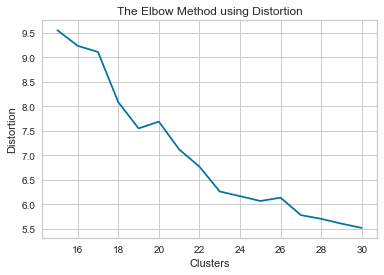

In [8]:
plt.plot(N, distortions, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()
plt.savefig('Km_dis_Elbow.png')

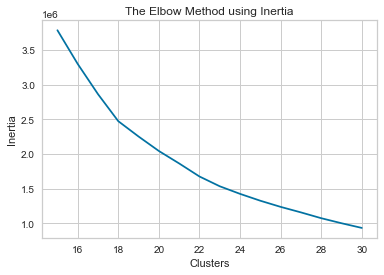

In [9]:
plt.plot(N, inertias, 'bx-') 
plt.xlabel('Clusters') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()
plt.savefig('Km_inert_Elbow.png')

In [15]:
# Model @ 22 Clusters 
kmeanModel = KMeans(n_clusters=22,init='k-means++', n_init=100,max_iter=300, algorithm='auto').fit(dataset) 
kmeanModel.fit(dataset) 

KMeans(n_clusters=22, n_init=100)

In [16]:
# Cluster Distribution 
Counter(kmeanModel.labels_)

Counter({13: 33,
         18: 946,
         4: 7953,
         11: 125,
         10: 67,
         3: 78,
         19: 194,
         14: 282,
         8: 223,
         15: 62,
         6: 50,
         2: 137,
         21: 398,
         17: 79,
         12: 1976,
         0: 559,
         16: 17,
         9: 14,
         1: 30,
         7: 15,
         20: 5,
         5: 3})

In [21]:
beer_cluster = kmeanModel.labels_

In [25]:
silhouette_score(dataset, beer_cluster, metric='euclidean')

0.6119100806744713

In [26]:
#Saving Models and appended DataFrame


#filename = ('..','data/kmean_model.sav')
#joblib.dump(kmeanModel, filename)

['/Users/eamonnmccallum/Monash-DS/groupwork/pp/PredictivePandas/PredictivePandas/data/kmean_model.sav']

In [27]:
#beer_raw_csv = pd.read_csv(('..','data/data/final_beerdata.csv')

In [28]:
#beer_csv["Kmeans Cluster"] = beer_cluster


In [29]:
#beer_csv.to_csv(('..','data/beerlist_w_Kmean.csv', index=False)